# Importing Libraries

In [ ]:
!pip install wordcloud
!pip install nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd 
import numpy as np 
import time
import pickle

#For Text Cleaning
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

#For EDA
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#For text vectorizing
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from gensim import corpora
from gensim import models
import random

#For naives bayes DF
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix   

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for bag-of-words
from sklearn import feature_extraction, model_selection, manifold, preprocessing
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
import tensorflow

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Preprocessing
This step is to compile all the different datasources

In [ ]:
'''
df1truth = pd.read_csv("True.csv") 
df1truth["label"] = "REAL"
#First 3 words of the text column indicate the branch of the news company(reuter) that is publishing the news article
#Remove the first 3 words of all text in the text column 
newtext = []
for i in df1truth['text']:
    newtext.append(' '.join(i.split(' ')[3:]))
df1truth['text'] = newtext

df1fake = pd.read_csv("Fake.csv") 
df1fake["label"] = "FAKE"

df2 = pd.read_csv("fake_or_real_news.csv")

df3 = pd.read_csv("news_articles.csv") 
df3 = df3.replace(["Real"], "REAL")
df3 = df3.replace(["Fake"], "FAKE")

#this dataframe is used to create CompiledNewsData.xlsx
dfcompiled = pd.concat([df1truth[["title","text","label","subject"]],df1fake[["title","text","label","subject"]],df2[["title","text","label"]],df3[["title","text","label","type"]]])
dfcompiled = dfcompiled[dfcompiled['text'].notna()]
maindf = dfcompiled[["title","text","label"]]

# Creating compiled DataFrame and exporting to Excel File
The following cell is for removing the stop words, and stemming the words inside the compiled data frame. After the dataframe is cleaned, it will create a new xlsx file to store the cleaned compiled data.

##Create dataframe with stemmed words

In [ ]:
#For Creating Cleaned dataframe without grammar
'''
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to clean the compiled dataframe
def preprocess(review):
    review = " ".join([stemmer.stem(w.lower()) for w in word_tokenize(re.sub('[^a-zA-Z]+', ' ', review.replace("<br />", ""))) if not w in stop_words])
    return review

#The bottom two lines will remove all stop words and stem the column text, takes very long do not run
maindf['text'] = maindf.apply(lambda x: preprocess(x['text']), axis=1)
maindf['title'] = maindf.apply(lambda x: preprocess(x['title']), axis=1)

#Export the new cleaned data into excel file
maindf.to_excel(r'CompiledNewsData.xlsx', index = False, header=True)
'''

##Create dataframe with Lemmetized words

In [ ]:
'''
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean the compiled dataframe
def preprocess(review):
    review = " ".join([lemmatizer.lemmatize(w.lower()) for w in word_tokenize(re.sub('[^a-zA-Z]+', ' ', review.replace("<br />", ""))) if not w in stop_words])
    return review

#The bottom two lines will remove all stop words and stem the column text, takes very long do not run
maindf['text'] = maindf.apply(lambda x: preprocess(x['text']), axis=1)
maindf['title'] = maindf.apply(lambda x: preprocess(x['title']), axis=1)

#Export the new cleaned data into excel file
maindf.to_excel(r'CompiledNewsDataLemmenized.xlsx', index = False, header=True)
'''

##Create Dataframe with grammar included

In [ ]:
#For Creating Dataframe With Grammar included
'''
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to clean the compiled dataframe
def preprocess(review):
    review = " ".join([stemmer.stem(w.lower()) for w in word_tokenize(review) if not w in stop_words])
    return review

#The bottom two lines will remove all stop words and stem the column text, takes very long do not run
maindf['text'] = maindf.apply(lambda x: preprocess(x['text']), axis=1)
maindf['title'] = maindf.apply(lambda x: preprocess(x['title']), axis=1)

#Export the new cleaned data into excel file
maindf.to_excel(r'CompiledNewsDataWithGrammar.xlsx', index = False, header=True)
'''

#Importing the cleaned dataframe and additional cleanup

In [ ]:
#This is the main compiled dataframe to work with
df = pd.read_excel("sample_data/CompiledNewsData.xlsx")
dfgrammar = pd.read_excel("sample_data/CompiledNewsDataWithGrammar.xlsx")  

#Dataframes had some duplicate titles and text
df = df.drop_duplicates()
df = df.dropna()
df['label'] = df['label'].apply(lambda x: 1 if x =='REAL' else 0)

dfgrammar = dfgrammar.drop_duplicates()
dfgrammar = dfgrammar.dropna()
dfgrammar['label'] = dfgrammar['label'].apply(lambda x: 1 if x =='REAL' else 0)

#Basic EDA

In [ ]:
#This is the main compiled dataframe to work with
news = df.copy()
# if we want to shuffle the order of the data. 
news['label'].value_counts()

1    24827
0    21826
Name: label, dtype: int64

As we can see, there is a total of 6144 duplicated rows and 485 data with missing values.

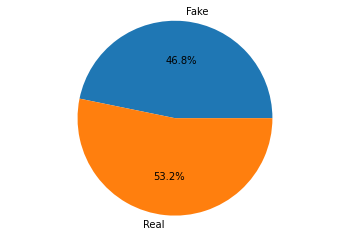

In [ ]:
Tasks = list(news[["title","label"]].groupby('label').count()["title"])
my_labels = 'Fake','Real'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

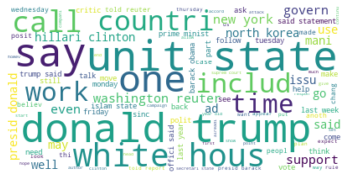

In [ ]:
#Compile all "labeled real into one text variable"
fullreal = ""
for i in news[news["label"] == 1]["text"]:
    fullreal += (str(i) + " ")
    
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(fullreal)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

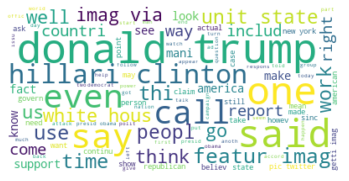

In [ ]:
#Compile all "labeled fake into one text variable"
fullfake = ""
for i in news[news["label"] == 0]["text"]:
    fullfake += (str(i) + " ")
    
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(fullfake)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()